# Stack Overflow's 2020 Annual Developer Survey Analysis 

In [ ]:
!python -V

Python 3.7.10


In [ ]:
#unzipping the files from the data source https://insights.stackoverflow.com/survey
import zipfile
with zipfile.ZipFile('/content/developer_survey_2020.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dev_survey/')

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
print(pd.__version__)
print(sns.__version__)

1.1.5
0.11.1


NameError: ignored

Reading the contents of the csv files into pandas Dataframes.<br/>
survey_public contains the survey data<br/>
survey_schema contains information on what each column in the survey_public means, i.e., what was the question asked.

In [ ]:
survey_public = pd.read_csv('/content/dev_survey/survey_results_public.csv')
survey_schema = pd.read_csv('/content/dev_survey/survey_results_schema.csv')

In [ ]:
survey_public.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [ ]:
survey_schema.set_index('Column').T.to_dict('list')

{'Age': ['What is your age (in years)? If you prefer not to answer, you may leave this question blank.'],
 'Age1stCode': ['At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'],
 'CompFreq': ['Is that compensation weekly, monthly, or yearly?'],
 'CompTotal': ['What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'],
 'ConvertedComp': ['Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'],
 'Country': ['Where do you live?'],
 'CurrencyDesc': ["Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."],
 'Curr

Selecting the subset of columns I want to use for my analysis and storing that in a dataframe called survey_subset.

In [ ]:
survey_subset = survey_public[['WorkWeekHrs','YearsCode','YearsCodePro','UndergradMajor','SOVisitFreq','PlatformWorkedWith','PlatformDesireNextYear',
                               'NEWOvertime','NEWOtherComms','NEWLearn','NEWJobHuntResearch',
                               'NEWEdImpt','NEWCollabToolsDesireNextYear','MiscTechDesireNextYear','MainBranch','LanguageWorkedWith','LanguageDesireNextYear',
                               'JobSat','JobFactors','EdLevel','Employment','DevType','DatabaseWorkedWith','DatabaseDesireNextYear','ConvertedComp','Age']]

In [ ]:
survey_subset.head()

,WorkWeekHrs,YearsCode,YearsCodePro,UndergradMajor,SOVisitFreq,PlatformWorkedWith,PlatformDesireNextYear,NEWOvertime,NEWOtherComms,NEWLearn,NEWJobHuntResearch,NEWEdImpt,NEWCollabToolsDesireNextYear,MiscTechDesireNextYear,MainBranch,LanguageWorkedWith,LanguageDesireNextYear,JobSat,JobFactors,EdLevel,Employment,DevType,DatabaseWorkedWith,DatabaseDesireNextYear,ConvertedComp,Age
0,50.0,36,27,"Computer science, computer engineering, or sof...",Multiple times per day,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Often: 1-2 days per week or more,No,Once a year,NaN,Fairly important,Microsoft Teams;Microsoft Azure;Trello,.NET Core;Xamarin,I am a developer by profession,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Slightly satisfied,"Languages, frameworks, and other technologies ...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,NaN,NaN
1,NaN,7,4,"Computer science, computer engineering, or sof...",Multiple times per day,iOS,iOS;Kubernetes;Linux;MacOS,NaN,No,Once a year,NaN,Fairly important,Github;Slack,React Native;TensorFlow;Unity 3D,I am a developer by profession,JavaScript;Swift,Python;Swift,Very dissatisfied,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, full-stack;Developer, mobile",NaN,NaN,NaN,NaN
2,NaN,4,NaN,NaN,Daily or almost daily,NaN,NaN,NaN,No,Once a decade,NaN,NaN,NaN,NaN,I code primarily as a hobby,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.0,7,4,"Computer science, computer engineering, or sof...",Multiple times per day,NaN,NaN,Occasionally: 1-2 days per quarter but less th...,Yes,Once a year,NaN,Not at all important/not necessary,NaN,NaN,I am a developer by profession,NaN,NaN,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,NaN,NaN,NaN,25.0
4,NaN,15,8,"Computer science, computer engineering, or sof...",A few times per month or weekly,AWS;Docker;Linux;MacOS;Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,NaN,Yes,Once a year,NaN,Very important,"Github;Google Suite (Docs, Meet, etc)",Ansible;Chef,"I used to be a developer by profession, but no...",HTML/CSS;Ruby;SQL,Java;Ruby;Scala,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,NaN,31.0


In [ ]:
survey_subset.shape

(64461, 26)

In [ ]:
survey_subset.describe()

,WorkWeekHrs,ConvertedComp,Age
count,41151.000000,3.475600e+04,45446.000000
mean,40.782174,1.037561e+05,30.834111
std,17.816383,2.268853e+05,9.585392
min,1.000000,0.000000e+00,1.000000
25%,40.000000,2.464800e+04,24.000000
50%,40.000000,5.404900e+04,29.000000
75%,44.000000,9.500000e+04,35.000000
max,475.000000,2.000000e+06,279.000000


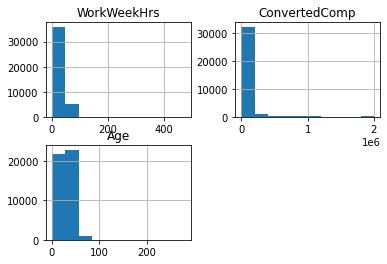

In [ ]:
survey_subset.hist();

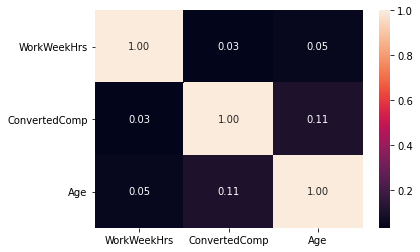

In [ ]:
import seaborn as sns
sns.heatmap(survey_subset.corr(), annot=True, fmt=".2f")

In [ ]:
survey_subset.dtypes

WorkWeekHrs                     float64
YearsCode                        object
YearsCodePro                     object
UndergradMajor                   object
SOVisitFreq                      object
PlatformWorkedWith               object
PlatformDesireNextYear           object
NEWOvertime                      object
NEWOtherComms                    object
NEWLearn                         object
NEWJobHuntResearch               object
NEWEdImpt                        object
NEWCollabToolsDesireNextYear     object
MiscTechDesireNextYear           object
MainBranch                       object
LanguageWorkedWith               object
LanguageDesireNextYear           object
JobSat                           object
JobFactors                       object
EdLevel                          object
Employment                       object
DevType                          object
DatabaseWorkedWith               object
DatabaseDesireNextYear           object
ConvertedComp                   float64


In [ ]:
#What are the counts of each Undergrad Major 
survey_subset.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

In [ ]:
#What platforms are most common as of 2020
survey_subset.PlatformWorkedWith.value_counts()

Windows                                                                                                          4770
Linux;Windows                                                                                                    2461
Linux                                                                                                            2112
Android                                                                                                          1201
Microsoft Azure;Windows                                                                                           996
                                                                                                                 ... 
AWS;Linux;Slack Apps and Integrations;WordPress                                                                     1
Android;AWS;Docker;Google Cloud Platform;Kubernetes;Linux;MacOS;Slack Apps and Integrations;Windows;WordPress       1
Android;Google Cloud Platform;Kubernetes;MacOS;Raspberry

In [ ]:
#What platforms are most popular in terms of what people want to work with in the future
survey_subset.PlatformDesireNextYear.value_counts()

Linux                                                                            2011
Windows                                                                          1747
Linux;Windows                                                                    1126
Android                                                                           823
Docker;Linux                                                                      784
                                                                                 ... 
AWS;Docker;Google Cloud Platform;Heroku;Linux;Windows;WordPress                     1
Android;Google Cloud Platform;IBM Cloud or Watson;Linux;MacOS;Microsoft Azure       1
Android;Arduino;Google Cloud Platform;iOS;MacOS;Windows                             1
Google Cloud Platform;iOS;Microsoft Azure;Raspberry Pi                              1
AWS;IBM Cloud or Watson;iOS;Kubernetes;Linux;MacOS;Raspberry Pi;WordPress           1
Name: PlatformDesireNextYear, Length: 7471, dtype: int

These values seems to have multiple entires within the same column. Need to find individual counts of each of these.

In [ ]:
#Splitting the column based on the delimiter ; to obtain individual entries. Note that these can be joined back to the DF to obtain individual rows for each entry.
platform_series = survey_subset['PlatformWorkedWith'].str.split(';').apply(pd.Series,1).stack()
platform_series.index = platform_series.index.droplevel(-1)
platform_series.name = 'PlatformWorkedWith'
platform_series

0             Windows
1                 iOS
4                 AWS
4              Docker
4               Linux
             ...     
64460         Android
64460         Arduino
64460           Linux
64460    Raspberry Pi
64460         Windows
Name: PlatformWorkedWith, Length: 178721, dtype: object

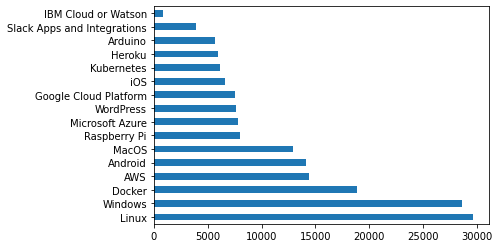

In [ ]:
#Distribution of Platforms worked with in 2020.
platform_series.value_counts().plot(kind = 'barh')

Linux is the most popular. Now I want to know what's the popular platform in terms of future interest.

In [ ]:
#Same operation as above. This returns a series.
platform_desired_ny = survey_subset['PlatformDesireNextYear'].str.split(';').apply(pd.Series,1).stack()
platform_desired_ny.index = platform_desired_ny.index.droplevel(-1)
platform_desired_ny.name = 'PlatformDesireNextYear'
platform_desired_ny

0                Android
0                    iOS
0             Kubernetes
0        Microsoft Azure
0                Windows
              ...       
64455            Android
64460            Arduino
64460              Linux
64460       Raspberry Pi
64460            Windows
Name: PlatformDesireNextYear, Length: 191869, dtype: object

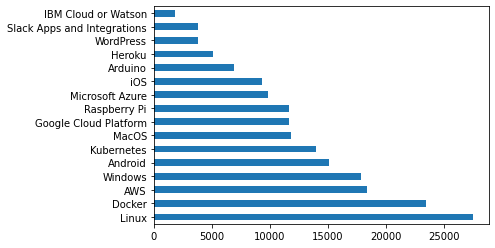

In [ ]:
#Distribution of popularity of platforms people want to work on in the near future.
platform_desired_ny.value_counts().plot(kind = 'barh')

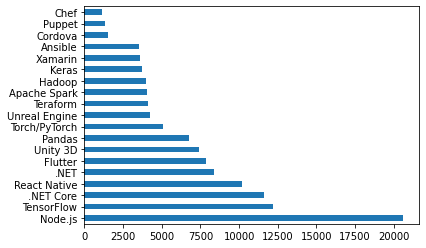

In [ ]:
#Distribution of Miscellaneous frameworks people want to work on in the near future
tech_desired_ny = survey_subset['MiscTechDesireNextYear'].str.split(';').apply(pd.Series,1).stack()
tech_desired_ny.index = tech_desired_ny.index.droplevel(-1)
tech_desired_ny.name = 'MiscTechDesireNextYear'
tech_desired_ny.value_counts().plot(kind = 'barh')

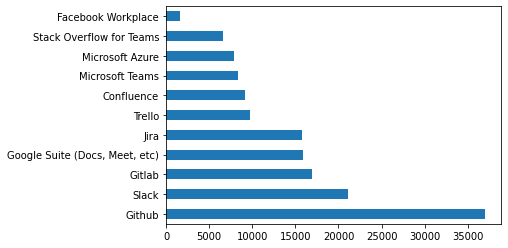

In [ ]:
#Most popular choice of collaboration tools the community uses/wants to use.
colab_desired_ny = survey_subset['NEWCollabToolsDesireNextYear'].str.split(';').apply(pd.Series,1).stack()
colab_desired_ny.index = colab_desired_ny.index.droplevel(-1)
colab_desired_ny.name = 'NEWCollabToolsDesireNextYear'
colab_desired_ny.value_counts().plot(kind = 'barh')

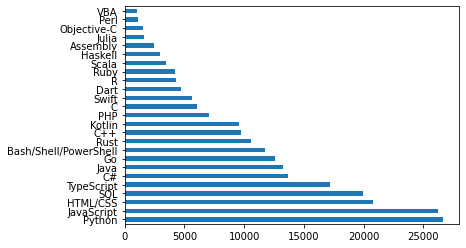

In [ ]:
#Programming Languages the community wants to learn in the future.
language = survey_subset['LanguageDesireNextYear'].str.split(';').apply(pd.Series,1).stack()
language.index = language.index.droplevel(-1)
language.name = 'LanguageDesireNextYear'
language.value_counts().plot(kind = 'barh')

Python and JavaScript seem to be in big demand. Not surprised.

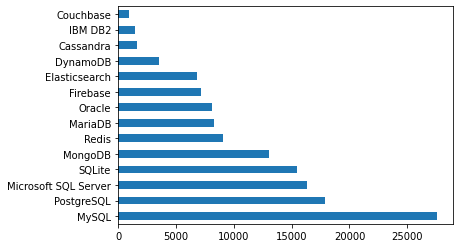

In [ ]:
#Distribution of popularity of databases worked with as of 2020.
database_old = survey_subset['DatabaseWorkedWith'].str.split(';').apply(pd.Series,1).stack()
database_old.index = database_old.index.droplevel(-1)
database_old.name = 'DatabaseWorkedWith'
database_old.value_counts().plot(kind = 'barh')

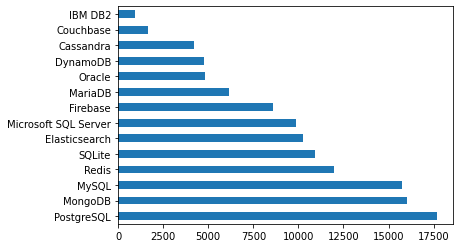

In [ ]:
#Distribution of popularity of frameworks the community wants to learn in the future.
database = survey_subset['DatabaseDesireNextYear'].str.split(';').apply(pd.Series,1).stack()
database.index = database.index.droplevel(-1)
database.name = 'DatabaseDesireNextYear'
database.value_counts().plot(kind = 'barh')

Now, I'm trying to find the average salaries(converted to USD) based on the education level.

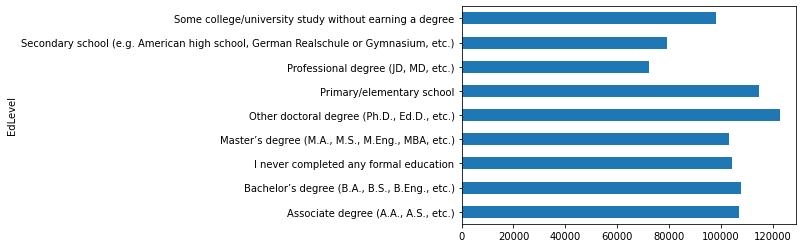

In [ ]:
#X-axis reflects amounts in USD
survey_subset.groupby('EdLevel').ConvertedComp.mean().plot(kind = 'barh')

Finally, I want to find average salaries based on the types of roles. Specifically for Data Scientists.

In [ ]:
#First getting each DevType into a new row.
survey_subset.DevType.value_counts()
dev_type = survey_subset['DevType'].str.split(';').apply(pd.Series,1).stack()
dev_type.index = dev_type.index.droplevel(-1)
dev_type.name = 'DevType'
dev_drop = survey_subset.drop('DevType', axis=1)
dev_full = dev_drop.join(dev_type)
dev_full.head()

,WorkWeekHrs,YearsCode,YearsCodePro,UndergradMajor,SOVisitFreq,PlatformWorkedWith,PlatformDesireNextYear,NEWOvertime,NEWOtherComms,NEWLearn,NEWJobHuntResearch,NEWEdImpt,NEWCollabToolsDesireNextYear,MiscTechDesireNextYear,MainBranch,LanguageWorkedWith,LanguageDesireNextYear,JobSat,JobFactors,EdLevel,Employment,DatabaseWorkedWith,DatabaseDesireNextYear,ConvertedComp,Age,DevType
0,50.0,36,27,"Computer science, computer engineering, or sof...",Multiple times per day,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Often: 1-2 days per week or more,No,Once a year,NaN,Fairly important,Microsoft Teams;Microsoft Azure;Trello,.NET Core;Xamarin,I am a developer by profession,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Slightly satisfied,"Languages, frameworks, and other technologies ...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,NaN,NaN,"Developer, desktop or enterprise applications"
0,50.0,36,27,"Computer science, computer engineering, or sof...",Multiple times per day,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Often: 1-2 days per week or more,No,Once a year,NaN,Fairly important,Microsoft Teams;Microsoft Azure;Trello,.NET Core;Xamarin,I am a developer by profession,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Slightly satisfied,"Languages, frameworks, and other technologies ...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,NaN,NaN,"Developer, full-stack"
1,NaN,7,4,"Computer science, computer engineering, or sof...",Multiple times per day,iOS,iOS;Kubernetes;Linux;MacOS,NaN,No,Once a year,NaN,Fairly important,Github;Slack,React Native;TensorFlow;Unity 3D,I am a developer by profession,JavaScript;Swift,Python;Swift,Very dissatisfied,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,NaN,"Developer, full-stack"
1,NaN,7,4,"Computer science, computer engineering, or sof...",Multiple times per day,iOS,iOS;Kubernetes;Linux;MacOS,NaN,No,Once a year,NaN,Fairly important,Github;Slack,React Native;TensorFlow;Unity 3D,I am a developer by profession,JavaScript;Swift,Python;Swift,Very dissatisfied,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,NaN,"Developer, mobile"
2,NaN,4,NaN,NaN,Daily or almost daily,NaN,NaN,NaN,No,Once a decade,NaN,NaN,NaN,NaN,I code primarily as a hobby,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


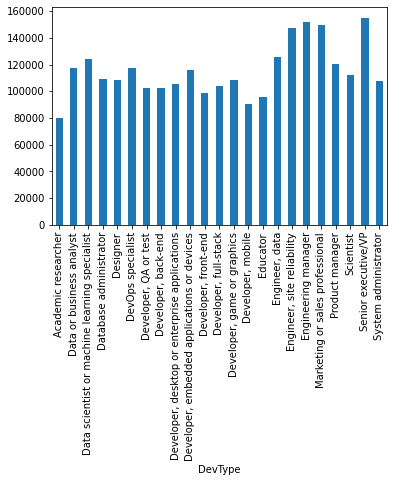

In [ ]:
#Distribution of salaries in USD based on developer type(role)
dev_full.groupby('DevType').ConvertedComp.mean().plot(kind = 'bar')

In [ ]:
#Exact Numbers 
dev_full.groupby('DevType').ConvertedComp.mean()

DevType
Academic researcher                               79984.802137
Data or business analyst                         117228.031972
Data scientist or machine learning specialist    123911.183276
Database administrator                           109036.082873
Designer                                         108321.920234
DevOps specialist                                117256.690296
Developer, QA or test                            102792.323741
Developer, back-end                              102814.559794
Developer, desktop or enterprise applications    105691.587989
Developer, embedded applications or devices      116052.122971
Developer, front-end                              99119.279678
Developer, full-stack                            103901.065755
Developer, game or graphics                      108271.385501
Developer, mobile                                 90740.525214
Educator                                          95941.580800
Engineer, data                                 

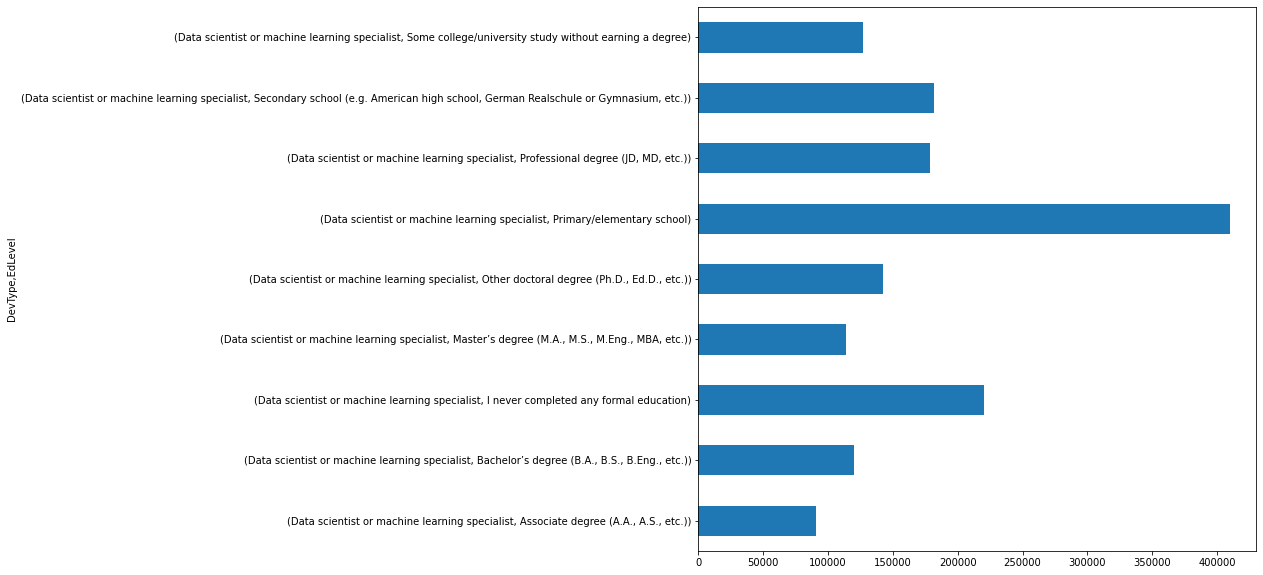

In [ ]:
#Finding the mean salaries of Data scientists based on education level to see if a certain group makes a lot more. 
dev_full.loc[dev_full['DevType']=='Data scientist or machine learning specialist'].groupby(['DevType','EdLevel']).ConvertedComp.mean().plot(kind = 'barh', figsize=(10,10))

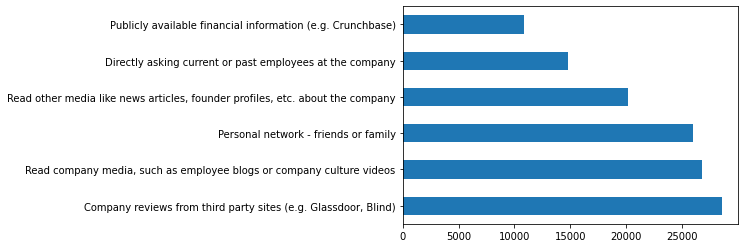

In [ ]:
job_research = survey_subset['NEWJobHuntResearch'].str.split(';').apply(pd.Series,1).stack()
job_research.index = job_research.index.droplevel(-1)
job_research.name = 'NEWJobHuntResearch'
job_research.value_counts().plot(kind = 'barh')